In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Load dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data_path = '/content/drive/MyDrive/project/data/survival_dataset.csv'
df=pd.read_csv(data_path)
df.head()

,time,event,age,sex,bmi,bp,comorbidity,treatment
0,4.30,1,68,1,28.2,110,2,0
1,35.48,0,81,0,18.0,133,0,1
2,28.70,0,58,1,31.2,100,1,0
3,18.70,0,44,1,31.4,157,0,0
4,45.86,0,72,0,23.4,90,1,0


In [ ]:
# Shape of dataset
print("Shape:", df.shape)
print("--------------------------")
# Info about columns and datatypes
df.info()
print("-----------------------------")
# Check for missing values
df.isnull().sum()


Shape: (1200, 8)
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         1200 non-null   float64
 1   event        1200 non-null   int64  
 2   age          1200 non-null   int64  
 3   sex          1200 non-null   int64  
 4   bmi          1200 non-null   float64
 5   bp           1200 non-null   int64  
 6   comorbidity  1200 non-null   int64  
 7   treatment    1200 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 75.1 KB
-----------------------------


,0
time,0
event,0
age,0
sex,0
bmi,0
bp,0
comorbidity,0
treatment,0


In [ ]:
# Event count
event_counts = df['event'].value_counts()
event_counts
# Censoring rate
censoring_rate = (df['event'] == 0).mean()
print("Censoring Rate:", censoring_rate)

Censoring Rate: 0.73


In [ ]:
df.describe()

,time,event,age,sex,bmi,bp,comorbidity,treatment
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,49.340708,0.270000,60.158333,0.482500,28.870167,134.684167,1.460833,0.501667
std,48.189032,0.444145,17.407780,0.499902,6.262695,25.528040,1.185877,0.500206
min,0.000000,0.000000,30.000000,0.000000,18.000000,90.000000,0.000000,0.000000
25%,15.137500,0.000000,46.000000,0.000000,23.375000,113.000000,1.000000,0.000000
50%,35.290000,0.000000,60.000000,0.000000,28.950000,135.500000,1.000000,1.000000
75%,65.970000,1.000000,76.000000,1.000000,34.300000,156.000000,2.000000,1.000000
max,302.370000,1.000000,89.000000,1.000000,39.900000,179.000000,6.000000,1.000000


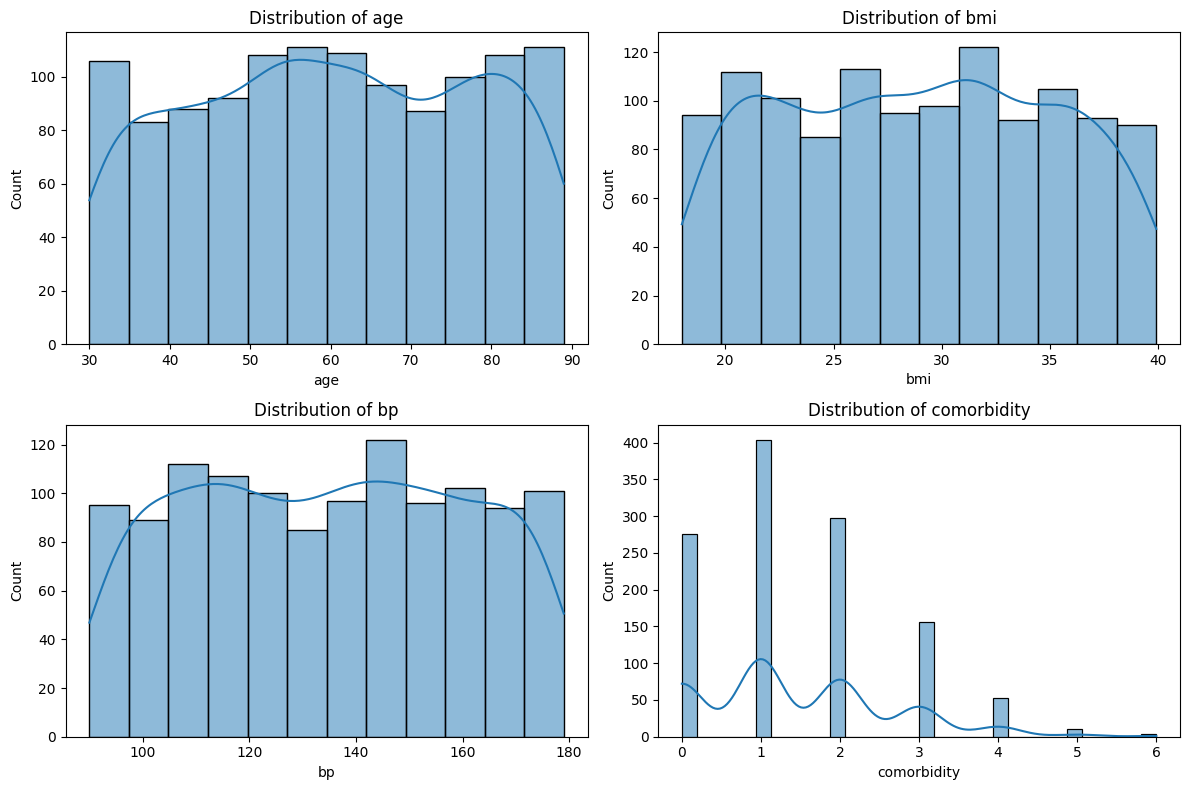

In [ ]:
num_cols = ["age", "bmi", "bp", "comorbidity"]

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 10.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=ba2a5b37e398428c7cd2ca4ba683f79f57f09f25acf78466ce697eb469e0f8ed
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


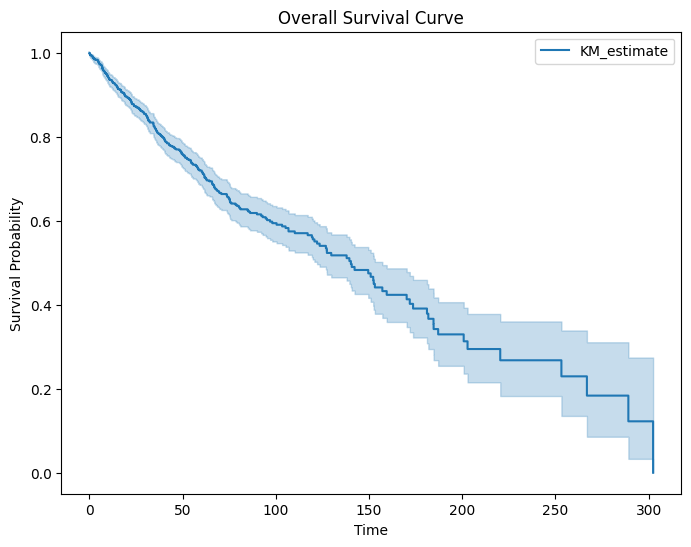

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(8,6))
kmf.fit(durations=df['time'], event_observed=df['event'])
kmf.plot()
plt.title("Overall Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

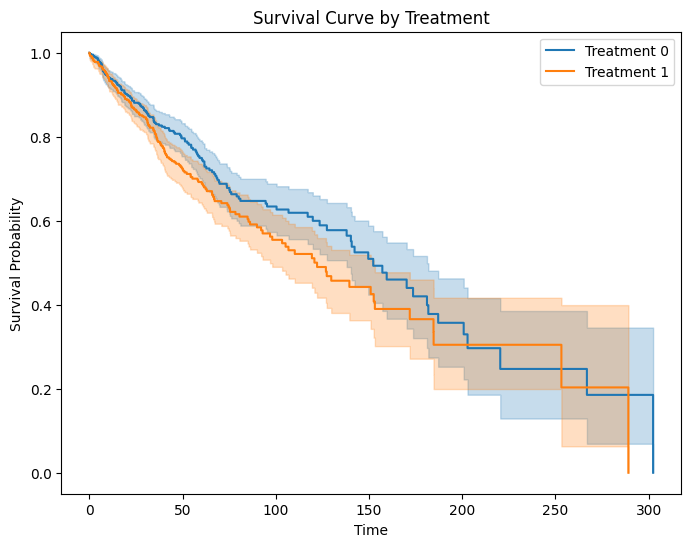

In [ ]:
plt.figure(figsize=(8,6))

for group in df['treatment'].unique():
    kmf.fit(
        durations=df[df['treatment'] == group]['time'],
        event_observed=df[df['treatment'] == group]['event'],
        label=f"Treatment {group}"
    )
    kmf.plot()

plt.title("Survival Curve by Treatment")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

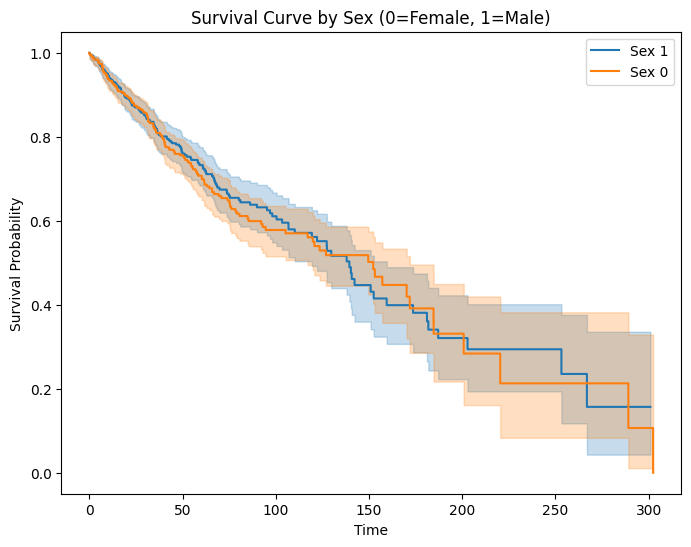

In [ ]:
plt.figure(figsize=(8,6))

for group in df['sex'].unique():
    kmf.fit(
        durations=df[df['sex'] == group]['time'],
        event_observed=df[df['sex'] == group]['event'],
        label=f"Sex {group}"
    )
    kmf.plot()

plt.title("Survival Curve by Sex (0=Female, 1=Male)")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()


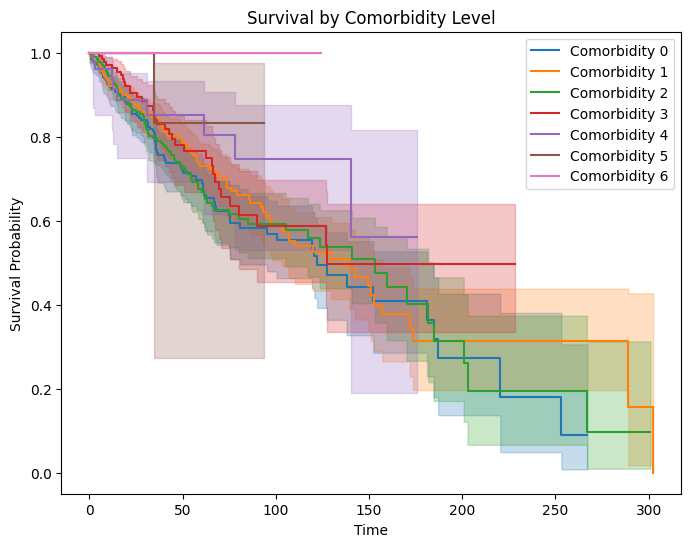

In [ ]:
plt.figure(figsize=(8,6))

for com in sorted(df['comorbidity'].unique()):
    kmf.fit(
        durations=df[df['comorbidity'] == com]['time'],
        event_observed=df[df['comorbidity'] == com]['event'],
        label=f"Comorbidity {com}"
    )
    kmf.plot()

plt.title("Survival by Comorbidity Level")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

✅ Saved full dataset with survival columns.
Saved full dataset with survival columns.
